# Завантаження датасетів

In [3]:
from datasets import load_dataset

In [4]:
queries = load_dataset('irds/clinicaltrials_2021_trec-ct-2021', 'queries', trust_remote_code=True)

In [5]:
docs = load_dataset('irds/clinicaltrials_2021', 'docs', trust_remote_code=True)

In [6]:
qrels = load_dataset('irds/clinicaltrials_2021_trec-ct-2021', 'qrels', trust_remote_code=True)

### Конвертація у датафрейми

#### QUERIES

In [7]:
from nltk.tokenize import sent_tokenize
import pandas as pd

In [8]:
processed_records = []

for record in queries:
    sentences = sent_tokenize(record['text'])
    sentences = [sentence for sentence in sentences if sentence]
    processed_text = '\n'.join(f"{i}. {sentence.strip()}" for i, sentence in enumerate(sentences, start=1))
    processed_records.append({'query_id': record['query_id'], 'text': processed_text})

In [9]:
df_queries = pd.DataFrame(processed_records)

In [10]:
df_queries.sample(10)

,query_id,text
4,5,"1. 74M hx of CAD s/p CABG, EF 60% prior CVA (n..."
30,31,1. The patient is a 37-year-old woman who came...
31,32,"1. A 17 year old boy complains of vomiting, n..."
46,47,1. A 62-year-old African-American man presente...
37,38,1. The patient is a 35-year-old woman with mya...
21,22,1. The patient is a 31-year-old woman complain...
0,1,1. Patient is a 45-year-old man with a history...
70,71,1. The patient is a 34-year-old obese woman wh...
41,42,1. 19 yo Hispanic female G1P1 at 32+ 6 weeks o...
60,61,1. The patient is a 45-year-old postmenopausal...


In [11]:
df_queries.shape

(75, 2)

In [12]:
print(df_queries.iloc[0, 1])

1. Patient is a 45-year-old man with a history of anaplastic astrocytoma of the spine complicated by severe lower extremity weakness and urinary retention s/p Foley catheter, high-dose steroids, hypertension, and chronic pain.
2. The tumor is located in the T-L spine, unresectable anaplastic astrocytoma s/p radiation.
3. Complicated by progressive lower extremity weakness and urinary retention.
4. Patient initially presented with RLE weakness where his right knee gave out with difficulty walking and right anterior thigh numbness.
5. MRI showed a spinal cord conus mass which was biopsied and found to be anaplastic astrocytoma.
6. Therapy included field radiation t10-l1 followed by 11 cycles of temozolomide 7 days on and 7 days off.
7. This was followed by CPT-11 Weekly x4 with Avastin Q2 weeks/ 2 weeks rest and repeat cycle.


#### DOCS

In [13]:
df_docs = pd.DataFrame(docs)

In [14]:
df_docs.sample(10)

,doc_id,title,condition,summary,detailed_description,eligibility
31890,NCT00365846,"""A Pilot Study to Determine the Safety of Camp...",,\n \n The purpose of the study is to s...,\n \n Twenty nine primary recipients o...,\n \n Inclusion Criteria:\r\n\r\n ...
43434,NCT00519246,Comparison of Pain Therapeutic Effects After B...,,\n \n With the incremental trend of be...,,\n \n Inclusion Criteria:\r\n\r\n ...
71441,NCT00889902,Molecular Markers in Cervical Cancer Screening...,,\n \n The purpose of this study is to:...,\n \n 1. To carry out large-scale pros...,\n \n Inclusion Criteria:\r\n\r\n ...
235771,NCT03041428,Ultra Protective Ventilation During Venoarteri...,,"\n \n Mechanical ventilation, in spite...",\n \n Mechanical ventilation is the co...,\n \n Inclusion Criteria:\r\n\r\n ...
68645,NCT00853021,Bevacizumab and Aldesleukin in Treating Patien...,,\n \n RATIONALE: Monoclonal antibodies...,\n \n OBJECTIVES:\r\n\r\n Primary...,\n \n DISEASE CHARACTERISTICS:\r\n...
5980,NCT00013299,Clinical Trials of Footwear in Patients With D...,,\n \n This is a randomized clinical tr...,\n \n This is a randomized clinical tr...,\n \n Diabetics with foot ulcerati...
327466,NCT04235855,EUS Guided Liver Biopsy - Will it Give Better ...,,\n \n Liver biopsy would be done by En...,"\n \n In this study, we aim to evaluat...",\n \n Inclusion Criteria:\r\n\r\n ...
31853,NCT00365352,XP13512 vs. Placebo in Patients With Restless ...,,\n \n The primary objective of this tr...,"\n \n This was a 12-week, multicenter,...",\n \n Inclusion Criteria:\r\n\r\n ...
123010,NCT01567969,Family Health and Development Project,,\n \n The Family Health and Developmen...,\n \n The Family Health and Developmen...,\n \n Inclusion Criteria:\r\n\r\n ...
56961,NCT00698711,Vaccination of Prostate Cancer Patients With M...,,\n \n The purpose of this research is ...,,\n \n Inclusion Criteria:\r\n\r\n ...


In [15]:
df_docs.shape

(375580, 6)

In [16]:
only_empty_strings = df_docs['condition'].apply(lambda x: x == "").all()
print("Column contains only empty strings:", only_empty_strings)

Column contains only empty strings: True


In [17]:
df_docs = df_docs.drop(['condition', 'detailed_description'], axis=1)

In [18]:
df_docs.sample(10)

,doc_id,title,summary,eligibility
196983,NCT02535299,Par-4 and Telomere-telomerase System in Type 2...,\n \n Objectives: To investigate the t...,\n \n Inclusion Criteria:\r\n\r\n ...
257687,NCT03326921,HA-1 T TCR T Cell Immunotherapy for the Treatm...,\n \n This phase I trial studies the s...,\n \n Inclusion Criteria:\r\n\r\n ...
50773,NCT00617175,Avoid DeliVering TherApies for Non-sustained A...,\n \n To demonstrate a reduction in th...,\n \n Inclusion Criteria:\r\n\r\n ...
7369,NCT00033657,Radiation Therapy and Chemotherapy Before and ...,\n \n RATIONALE: Radiation therapy use...,\n \n Inclusion Criteria:\r\n\r\n ...
340280,NCT04402814,IgG/IgM Antibody Test in Patients Who Have Tes...,\n \n The purpose of this study is to ...,\n \n Inclusion Criteria:\r\n\r\n ...
97543,NCT01234064,Graduated Compression Stockings (GCS) Pilot Su...,\n \n This is a pilot substudy to the ...,\n \n Inclusion Criteria:\r\n\r\n ...
35287,NCT00410930,Efficacy and Safety of Subcutaneous Immunother...,\n \n To compare versus placebo the ef...,\n \n Inclusion Criteria:\r\n\r\n ...
205408,NCT02645383,PASCAL Laser Platform Produces Less Pain Respo...,\n \n The aim of this study is to comp...,\n \n Inclusion Criteria:\r\n\r\n ...
243762,NCT03145532,Transcranial Direct-Current Stimulation (tCDS)...,\n \n Hemiplegia occurs when the funct...,\n \n Inclusion Criteria:\r\n\r\n ...
346348,NCT04481815,Rituximab Plus Methotrexate With or Without Le...,"\n \n It is a multicenter, open-Label,...",\n \n Inclusion Criteria:\r\n\r\n ...


In [19]:
df_docs.shape

(375580, 4)

#### QRELS

In [20]:
df_qrels = pd.DataFrame(qrels)

In [21]:
df_qrels.sample(10)

,query_id,doc_id,relevance,iteration
20607,43,NCT01703494,2,0
13631,29,NCT01653899,2,0
26732,57,NCT02146521,2,0
22437,47,NCT01220336,1,0
10379,22,NCT04246619,0,0
21438,45,NCT00590200,0,0
26419,56,NCT02629549,0,0
18946,40,NCT01026584,0,0
5718,13,NCT01611025,2,0
2097,5,NCT02527759,0,0


In [22]:
df_qrels.shape

(35832, 4)

In [23]:
df_qrels = df_qrels.drop('iteration', axis=1)

In [24]:
df_qrels.sample(10)

,query_id,doc_id,relevance
18527,39,NCT01800162,0
6714,15,NCT01465516,0
2896,7,NCT00164060,0
17804,37,NCT03108573,2
10413,22,NCT04618666,2
2515,6,NCT01734525,1
28603,61,NCT01689610,2
33548,71,NCT01335490,0
10215,22,NCT02512146,0
558,2,NCT02167906,0


In [25]:
df_qrels.shape

(35832, 3)

### Об'єднання датасетів

In [26]:
df_qrels_docs_merged = pd.merge(df_qrels, df_docs, on='doc_id')

In [27]:
df_qrels_docs_merged.sample(10)

,query_id,doc_id,relevance,title,summary,eligibility
35233,74,NCT04250792,0,Efficacy of Low Dose Naltrexone in Psoriasis,\n \n Objective of the study is to det...,\n \n Inclusion Criteria:\r\n\r\n ...
19066,40,NCT02418949,0,Altering Activation Patterns Post-stroke,\n \n This study evaluates a new rehab...,\n \n Inclusion Criteria:\r\n\r\n ...
14997,32,NCT02205541,2,Eculizumab in Shiga-toxin Related Hemolytic an...,\n \n The investigators aim to perform...,\n \n Inclusion Criteria:\r\n\r\n ...
30637,65,NCT01727817,1,Early Feasibility Study 2 of Outpatient Contro...,"\n \n An unblinded, randomized, cross-...",\n \n Inclusion Criteria:\r\n\r\n ...
25310,53,NCT03374319,0,Somatotopic Configuration of Distal Residual L...,\n \n The hypothesis of this research ...,\n \n Inclusion Criteria:\r\n\r\n ...
23179,48,NCT03812016,0,A Real-time Magnetic Device Prototype for Temp...,\n \n To develop a real-time magnetic ...,\n \n Inclusion Criteria:\r\n\r\n ...
22527,47,NCT01975194,2,Rosuvastatin in African Americans With Cerebro...,\n \n This study will assess the rate ...,\n \n Inclusion Criteria:\r\n\r\n ...
17169,36,NCT02610660,0,Tracking Outcomes and Practice in Pediatric Pu...,\n \n The TOPP-2 registry is an intern...,\n \n Inclusion Criteria:\r\n\r\n ...
24436,51,NCT04764344,0,Haloperidol for the Treatment of Nausea and Vo...,"\n \n Single center, double-blind, ran...",\n \n Inclusion Criteria:\r\n\r\n ...
5375,12,NCT02371863,0,Normal Values in Stress Echocardiographic Para...,\n \n Surgical treatment is the only a...,\n \n Inclusion Criteria:\r\n\r\n ...


In [28]:
df_final = pd.merge(df_qrels_docs_merged, df_queries, on='query_id')

In [29]:
df_final.sample(10)

,query_id,doc_id,relevance,title,summary,eligibility,text
3385,8,NCT00107614,0,"DT PACE, Tandem Autologous Transplant, Mainten...",\n \n The purpose of this study is to ...,\n \n Inclusion Criteria:\r\n\r\n ...,1. This is a 57-year-old gentleman with CLL an...
34062,72,NCT00618813,0,Two Regimens of Combination Chemotherapy in Tr...,\n \n This clinical trial is studying ...,\n \n Inclusion Criteria:\r\n\r\n ...,1. The patient is a 16-year-old girl recently ...
29607,63,NCT02473393,0,A Clinical Trial to Assess Three Different Dos...,"\n \n To assess safety, efficacy and p...",\n \n Inclusion Criteria:\r\n\r\n ...,1. A 54-year-old obese woman admitted to the e...
26353,56,NCT01568359,2,Calcium Homeostasis in Acromegaly: Effect of S...,\n \n The purpose of the study is to e...,\n \n Inclusion Criteria:\r\n\r\n ...,1. The patient is a 41-year-old man and a know...
3201,7,NCT03420144,0,Growth Hormone Therapy in Liver Cirrhosis,\n \n Liver cirrhosis (LC) is a leadin...,\n \n Inclusion Criteria:\r\n\r\n ...,"1. 60 yo M with Hep C cirrhosis, grade II esop..."
25634,54,NCT02020889,0,A Study to Investigate Mepolizumab in the Trea...,"\n \n The purpose of this randomized, ...",\n \n Inclusion Criteria:\r\n\r\n ...,1. A 57-year-old man was admitted to the clini...
31163,66,NCT01374659,0,Diagnostic Utility of [18F]-FDG-PET/CT and [12...,\n \n Several studies have indicated t...,\n \n Inclusion Criteria:\r\n\r\n ...,1. A 16-year-old girl came to the clinic compl...
3737,8,NCT03336203,0,The Impact of Urate-lowering Therapy on Kidney...,\n \n This trial aims to investigate t...,\n \n Inclusion Criteria:\r\n\r\n ...,1. This is a 57-year-old gentleman with CLL an...
4705,10,NCT03475589,0,Study on the Adverse Drug Reactions (ADRs) of ...,"\n \n The tolerability of apatinib, an...",\n \n Inclusion Criteria:\r\n\r\n ...,1. Pt is a 22yo F otherwise healthy with a 5 y...
16985,36,NCT01040663,0,Isocaloric Dietary Interventions for Insulin R...,"\n \n In recent decades, the prevalenc...",\n \n Inclusion Criteria:\r\n\r\n ...,1. The patient is a 32-year-old obese woman wh...


In [30]:
df_final = df_final[['query_id', 'text', 'doc_id', 'title', 'summary', 'eligibility', 'relevance']]

### Відсутні значення/дублікати

In [31]:
df_final.duplicated().sum()

0

In [32]:
def missing_values_info(data):
    res = pd.DataFrame((data.isnull().sum() / data.shape[0] * 100).sort_values(ascending=False))
    res.columns = ['PERCENT_OF_MISSING_VALUES']
    return res

In [33]:
missing_values_info(df_final)

,PERCENT_OF_MISSING_VALUES
query_id,0.0
text,0.0
doc_id,0.0
title,0.0
summary,0.0
eligibility,0.0
relevance,0.0


### Обробка колонки eligibility

In [34]:
import re

In [35]:
def extract_pattern(text):
    pattern = r'\n\s*\n\s*(\w+)'
    match = re.search(pattern, text)
    if match:
        return match.group(0)  
    else:
        return None

In [36]:
eligibility_patterns = pd.DataFrame()
eligibility_patterns['starting_string'] = df_final['eligibility'].apply(extract_pattern)

In [37]:
grouped_counts = df_final.groupby(eligibility_patterns['starting_string']).size().sort_values(ascending=False)

In [38]:
grouped_counts.head(10)

starting_string
\n      \n        Inclusion    32488
\n      \n        DISEASE        502
\n      \n        INCLUSION      253
\n      \n        Key            232
\n\r\n               1           166
\n\r\n        EXCLUSION          131
\n      \n        Patients        80
\n      \n        1               76
\n      \n        ENTRY           75
\n\r\n        Patients            62
dtype: int64

In [39]:
mask = df_final['eligibility'].str.startswith('\n      \n        Inclusion')
df_final_filtered = df_final[mask]

In [40]:
df_final_filtered.sample(10)

,query_id,text,doc_id,title,summary,eligibility,relevance
30310,64,1. The patient is a 55-year-old man diagnosed ...,NCT03892681,Hepatocyte-specific Versus Extracellular Contr...,\n \n Adult patients with chronic hepa...,\n \n Inclusion Criteria:\r\n\r\n ...,0
9923,21,1. The patient is a 57-year-old man with abdom...,NCT04196504,Prevalence of Echocardioghraphic and ECG Chang...,\n \n Cardiovascular system involvemen...,\n \n Inclusion Criteria:\r\n\r\n ...,2
27737,59,1. The patient is a 15-year-old boy with asthm...,NCT02825043,HFNC Effect on BCSS in Patients With COPD,\n \n The primary objective of this st...,\n \n Inclusion Criteria:\r\n\r\n ...,0
29224,62,1. A 46-year-old man presents with dizziness a...,NCT02850081,Statin Neuroprotection and Carotid Endarterect...,\n \n The investigators hypothesize th...,\n \n Inclusion Criteria:\r\n\r\n ...,1
24276,51,1. The patients is a 25-year-old G1 P1 pregnan...,NCT03169621,Diagnosis of Chronic Endometritis in Endometri...,\n \n Chronic endometritis (CE) is a p...,\n \n Inclusion Criteria:\r\n\r\n ...,0
24768,52,1. A 34 year old man comes to the clinic compl...,NCT03029949,Acceptance and Commitment Therapy With Vestibu...,\n \n The purpose of this study is to ...,\n \n Inclusion Criteria:\r\n\r\n ...,0
18485,39,1. A 3-day-old Asian female infant presents wi...,NCT01244503,Prediction of Severity of Liver Disease by a 1...,\n \n The purpose of the study is to d...,\n \n Inclusion Criteria:\r\n\r\n ...,0
2965,7,"1. 60 yo M with Hep C cirrhosis, grade II esop...",NCT00985010,Manganese in Women With Encephalopathy,\n \n Objective:\r\n\r\n Report m...,\n \n Inclusion Criteria:\r\n\r\n ...,0
23412,49,1. A 12 year old girl came to the clinic with ...,NCT01590095,WASH Benefits Bangladesh,\n \n Brief Summary:\r\n\r\n The ...,\n \n Inclusion Criteria:\r\n\r\n ...,0
767,2,"1. 48 M with a h/o HTN hyperlipidemia, bicuspi...",NCT04527367,Epidemiology and Long-term Outcome of Patients...,\n \n Valvular heart diseases are sign...,\n \n Inclusion Criteria:\r\n\r\n ...,2


In [48]:
print(df_final_filtered.iloc[4, 5])


      
        Inclusion Criteria:

          -  Patients must have histologically proven malignant glioma (anaplastic astrocytoma,
             anaplastic oligodendroglioma or glioblastoma multiforme) which is progressive or
             recurrent after radiation therapy ± chemotherapy; patients with previous low grade
             glioma who progressed after radiotherapy ± chemotherapy and are biopsied and found to
             have a high grade glioma are eligible

          -  Patients must have measurable progressive or recurrent malignant glioma by MRI or CT
             imaging; (Within 14 days before starting treatment)

          -  Patients must have recovered from toxicity of prior therapy; an interval of at least 3
             months must have elapsed since the completion of the most recent course of radiation
             therapy, while at least 3 weeks must have elapsed since the completion of a
             non-nitrosourea containing chemotherapy regimen, and at least 

In [50]:
print(df_final_filtered.iloc[8, 5])


      
        Inclusion Criteria:

          -  Clinical diagnosis of cerebrovascular accident

          -  Single event

          -  Unilateral hemiplegia

          -  Between 6 months and 18 months post-event

          -  Impairment of upper-extremity function

          -  Ability to produce partial range of motion out of plane of gravity at shoulder, elbow,
             and wrist

          -  At least 10 degrees of wrist motion (any 10 degrees), and finger flexion/extension in
             2 fingers

          -  Cognitive ability to follow 3-step commands

        Exclusion Criteria:

          -  Unstable or uncontrolled blood pressure

          -  Uncontrolled seizures

          -  Flaccid hemiplegia

          -  Severe cognitive impairment
      
    


In [51]:
def numerate_criteria(text):
    inclusion_pattern = re.compile(r'Inclusion criteria', re.IGNORECASE)
    exclusion_pattern = re.compile(r'Exclusion criteria', re.IGNORECASE)
    paragraphs = re.split(r'\r\n\r\n*', text)
    numbered_paragraphs = []
    counter = 0
    incl_crit_number = 0
    excl_crit_number = 0
    is_excl_criterion = False
    for para in paragraphs:
        if inclusion_pattern.search(para):
            counter = 0
            numbered_paragraphs.append(para.strip())
        elif exclusion_pattern.search(para):
            is_excl_criterion = True
            incl_crit_number = counter
            counter = 0
            numbered_paragraphs.append(para.strip())
        else:
            leading_spaces = len(re.match(r'^\s*', para).group(0))
            if leading_spaces == 10:
                counter += 1
                if para.strip().startswith("-") or re.match(r'^\d+\.', para.strip()):
                    para = re.sub(r'^\s*[\-\d.]+\s*', '', para)
                numbered_paragraphs.append(f"{counter}. {para.strip()}")  
            else:
                numbered_paragraphs.append(f"{para.strip()}")
    if is_excl_criterion:
        excl_crit_number = counter
    else:
        incl_crit_number = counter
    return '\n\n'.join(numbered_paragraphs), incl_crit_number, excl_crit_number

In [52]:
df_final_filtered = pd.DataFrame(df_final_filtered)

In [53]:
df_final_filtered['eligibility'], df_final_filtered['inclusion_criteria_number'], df_final_filtered['exclusion_criteria_number'] = zip(*df_final_filtered['eligibility'].apply(numerate_criteria))

In [54]:
df_final_filtered.sample(10)

,query_id,text,doc_id,title,summary,eligibility,relevance,inclusion_criteria_number,exclusion_criteria_number
12992,28,1. The patient is a 60-year-old Spanish man pr...,NCT01097707,A Study in Men With Benign Prostatic Hyperplasia,\n \n The purpose of the study is to d...,Inclusion Criteria:\n\n1. Present at screening...,0,9,9
27948,60,1. The patient is a 63-year-old man presenting...,NCT00381108,Study of the Effects of Pomegranate Tablets on...,\n \n To determine whether pomegranate...,Inclusion Criteria:\n\n1. 18 years of age or o...,2,2,4
28750,61,1. The patient is a 45-year-old postmenopausal...,NCT03109522,Axillary Reverse Mapping (ARM) Technique,\n \n The purpose of this pilot study ...,Inclusion Criteria: women diagnosed with invas...,1,4,6
17210,36,1. The patient is a 32-year-old obese woman wh...,NCT02940613,Using Visual Feedback to Influence Rapid Respo...,\n \n This study has two aims: 1) to t...,Inclusion Criteria:\n\n1. BMI (Body Mass Index...,0,2,1
11280,24,1. The patient is a 55 year old man visiting h...,NCT03994263,A Prospective Study to Observe the Mechanism o...,\n \n A total of up to 15 eligible sub...,Inclusion Criteria:\n\n1. Subject signed infor...,2,9,13
16751,35,1. The patient is a 15 year old girl with the ...,NCT03806595,A Pilot Study of Intranasal Lidocaine in Acute...,\n \n Headaches in children are very c...,Inclusion Criteria:\n\n1. Children aged 7-16 y...,2,6,5
29629,63,1. A 54-year-old obese woman admitted to the e...,NCT02674750,Study to Evaluate the Efficacy and Safety of C...,"\n \n This is a Phase 2, open-label, m...",Inclusion Criteria:\n\n1. Age ≥ 18 years.\n\n2...,0,3,7
29635,63,1. A 54-year-old obese woman admitted to the e...,NCT02691845,Initiating and Maintaining Physical Activity i...,\n \n The investigators propose a rand...,"Inclusion Criteria:\n\n1. Sedentary, i.e., hav...",0,9,0
34566,73,1. The patient is a 3-day-old female infant wi...,NCT02177461,Telmisartan Compared With Enalapril in Elderly...,\n \n Study to assess the efficacy and...,Inclusion Criteria:\n\n1. Age ≥ 65 years\n\n2....,0,3,22
32433,69,1. A 67-year-old healthy woman came to the cli...,NCT01164553,Comparison of Flu Vaccine Doses in Children,\n \n The purpose of this study is to ...,Inclusion Criteria:\n\nAll Subjects\n\n1. Heal...,1,5,19


In [55]:
df_final = df_final_filtered[df_final_filtered['inclusion_criteria_number'] != 0]

In [56]:
df_final = df_final[df_final['exclusion_criteria_number'] != 0]

In [57]:
df_final_filtered.shape

(32488, 9)

In [58]:
df_final.shape

(28331, 9)

In [59]:
df = pd.DataFrame(df_final)

df[['inclusion_criteria', 'exclusion_criteria']] = df['eligibility'].str.split(r'(?i)Exclusion Criteria:', n=1, expand=True)

df['inclusion_criteria'] = df['inclusion_criteria'].str.strip().str.replace(r'(?i)Inclusion Criteria:', '', regex=True)
df['exclusion_criteria'] = df['exclusion_criteria'].str.strip()

df.drop(columns=['eligibility'], inplace=True)

In [60]:
df.shape

(28331, 10)

In [61]:
df_suitable_length = df[(df['inclusion_criteria'].str.len() < 1000) & (df['exclusion_criteria'].str.len() < 1000)]

In [62]:
df_suitable_length.shape

(18543, 10)

In [63]:
df_cut = pd.DataFrame(df_suitable_length)

### Розподіли категорій "relevance"

In [64]:
df_cut['relevance'].value_counts()

relevance
0    12366
2     3181
1     2996
Name: count, dtype: int64

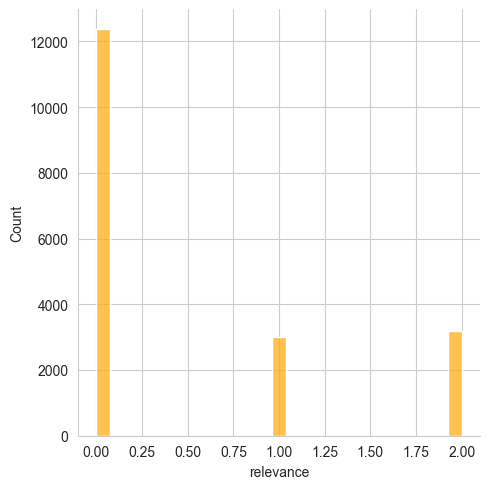

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df_cut['relevance'], color="#FDAE14")

In [76]:
def plot_relevance_counts(df, figsize=(22, 4), xlabel='Query ID', ylabel='Counts'):
    grouped_data = df.groupby(['query_id', 'relevance']).size().reset_index(name='counts')
    
    custom_palette = ['#B1401D', '#FDAE14', '#59B243']
    plt.figure(figsize=figsize)
    sns.barplot(x='query_id', y='counts', hue='relevance', data=grouped_data, palette=custom_palette)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

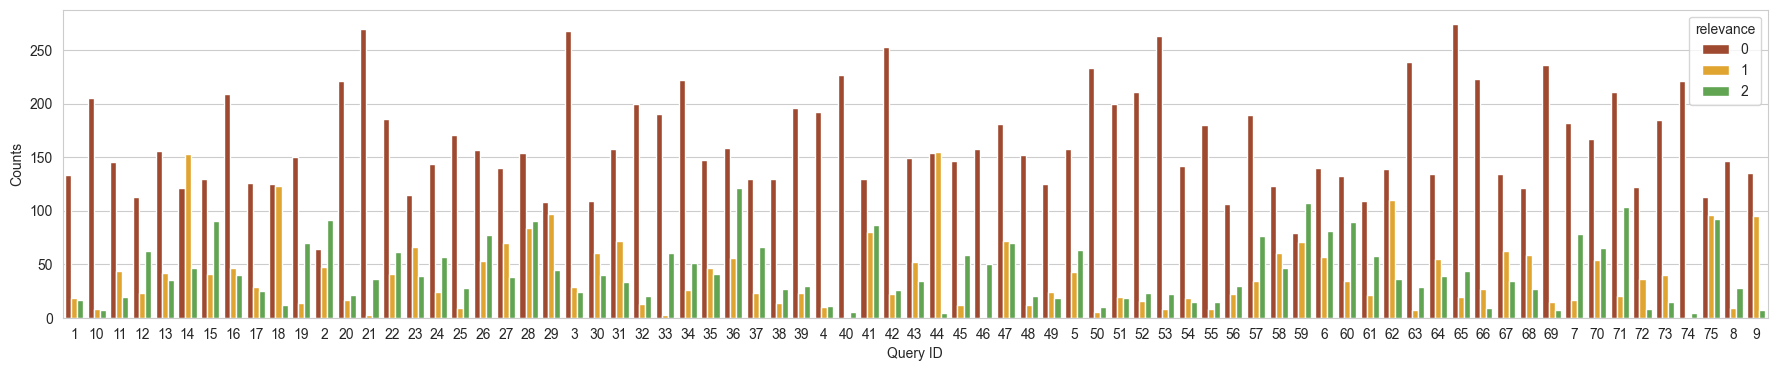

In [77]:
plot_relevance_counts(df_cut)

In [78]:
grouped = df_cut.groupby('query_id')

undersampled = pd.DataFrame()

for name, group in grouped:
    counts = group['relevance'].value_counts()
    
    average_count = counts[counts.index != 0].mean().astype(int)
    
    sampled_group_zero = group[group['relevance'] == 0].sample(min(average_count, len(group[group['relevance'] == 0])), replace=True)
    sampled_group_nonzero = group[group['relevance'] != 0]
    
    sampled_group = pd.concat([sampled_group_zero, sampled_group_nonzero])
    undersampled = pd.concat([undersampled, sampled_group])

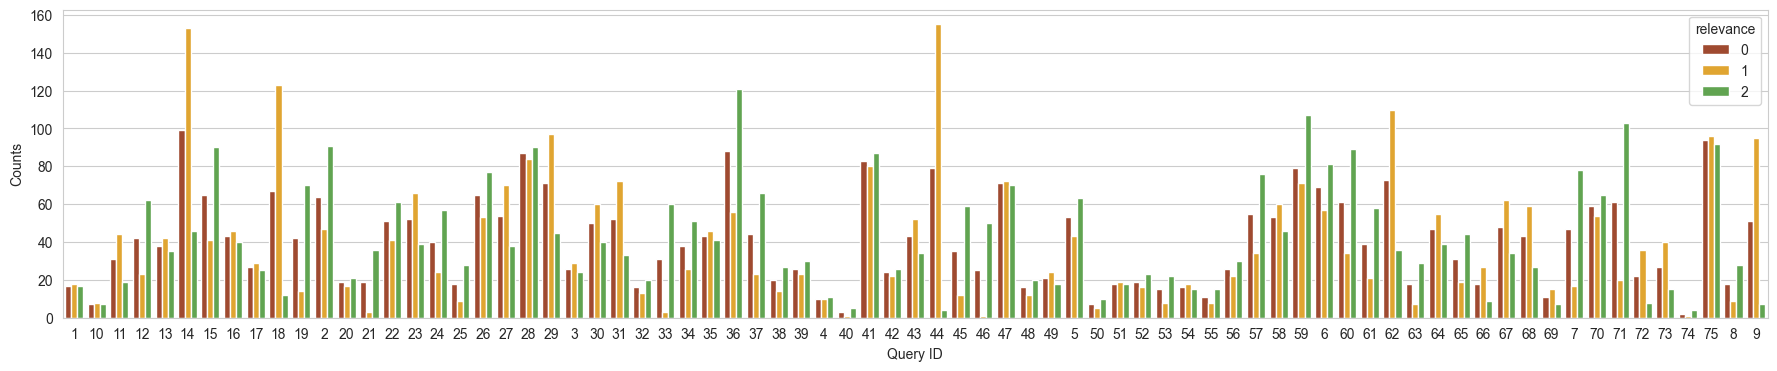

In [79]:
plot_relevance_counts(undersampled)

In [80]:
undersampled['relevance'].value_counts()

relevance
2    3181
0    3053
1    2996
Name: count, dtype: int64

In [81]:
undersampled.shape

(9230, 10)

### Поділ датасету

In [83]:
undersampled = undersampled[['query_id', 'text', 'doc_id', 'title', 'inclusion_criteria', 'exclusion_criteria', 'inclusion_criteria_number', 'exclusion_criteria_number', 'relevance']]

In [86]:
def plot_value_counts(dataframe, column='query_id'):

    value_counts = dataframe[column].value_counts()

    plt.figure(figsize=(30, 6))
    value_counts.plot(kind='bar', color="#FDAE14")
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()

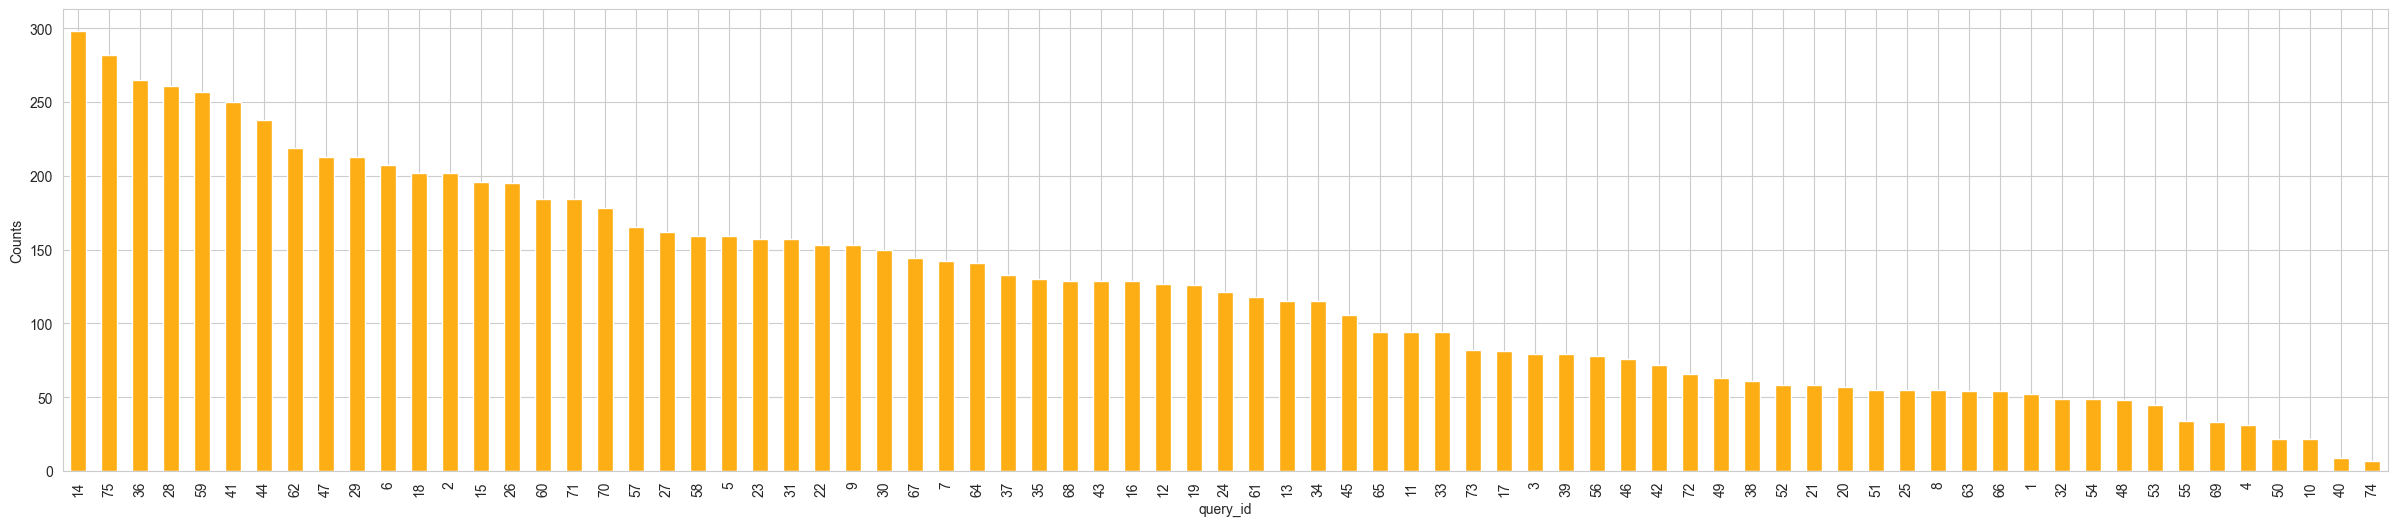

In [87]:
plot_value_counts(undersampled)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
df_sorted = undersampled.sort_values(by='query_id')
query_ids = df_sorted['query_id'].unique()

train_query_ids, test_query_ids = train_test_split(query_ids, test_size=0.2, random_state=42)

df_train = df_sorted[df_sorted['query_id'].isin(train_query_ids)]
df_test = df_sorted[df_sorted['query_id'].isin(test_query_ids)]

In [90]:
df_train.shape

(7564, 9)

In [91]:
df_test.shape

(1666, 9)

In [92]:
df_train['relevance'].value_counts()

relevance
2    2668
0    2500
1    2396
Name: count, dtype: int64

In [93]:
df_test['relevance'].value_counts()

relevance
1    600
0    553
2    513
Name: count, dtype: int64

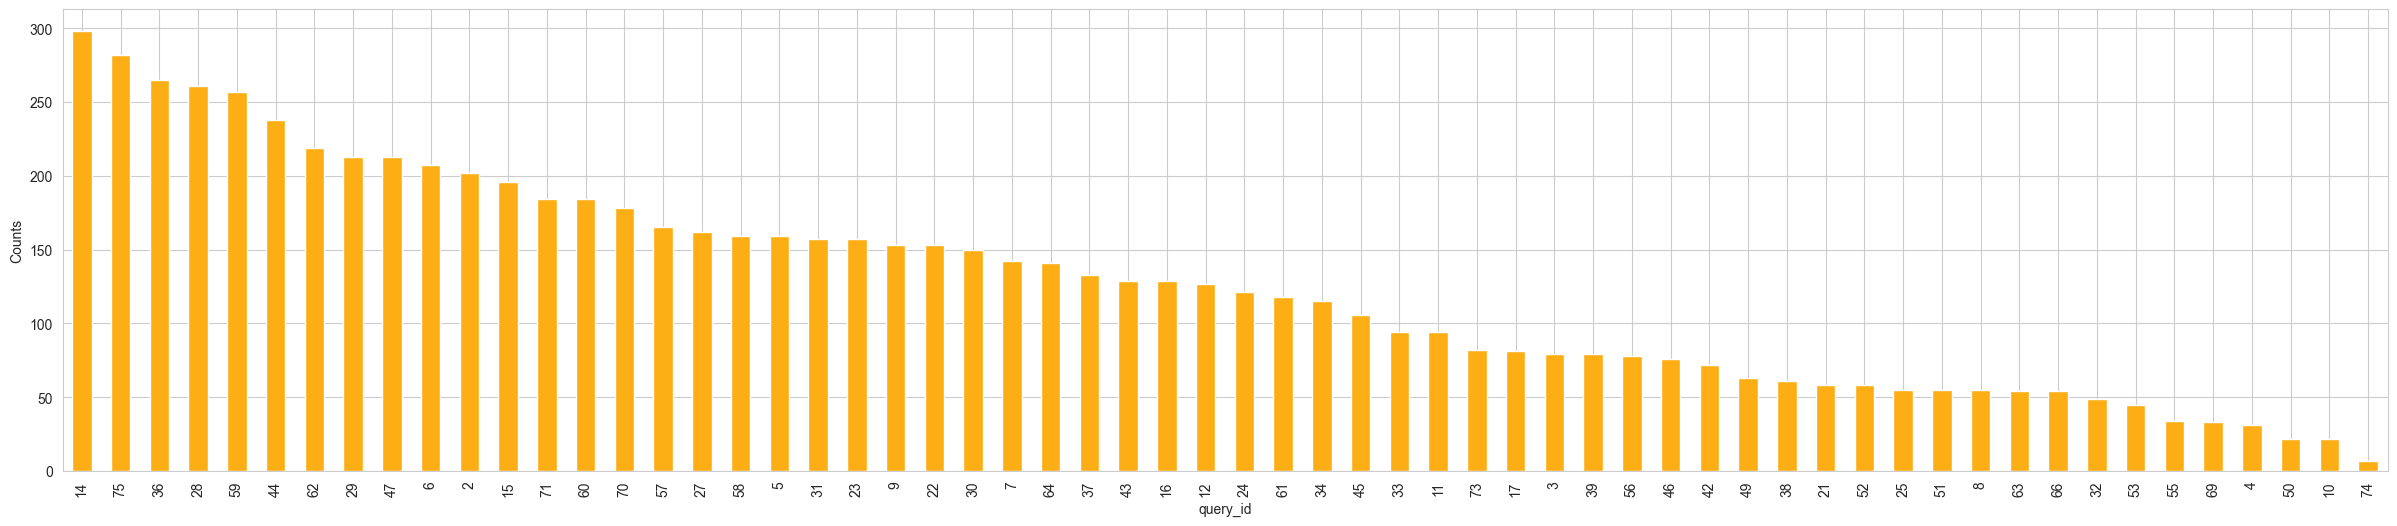

In [94]:
plot_value_counts(df_train)

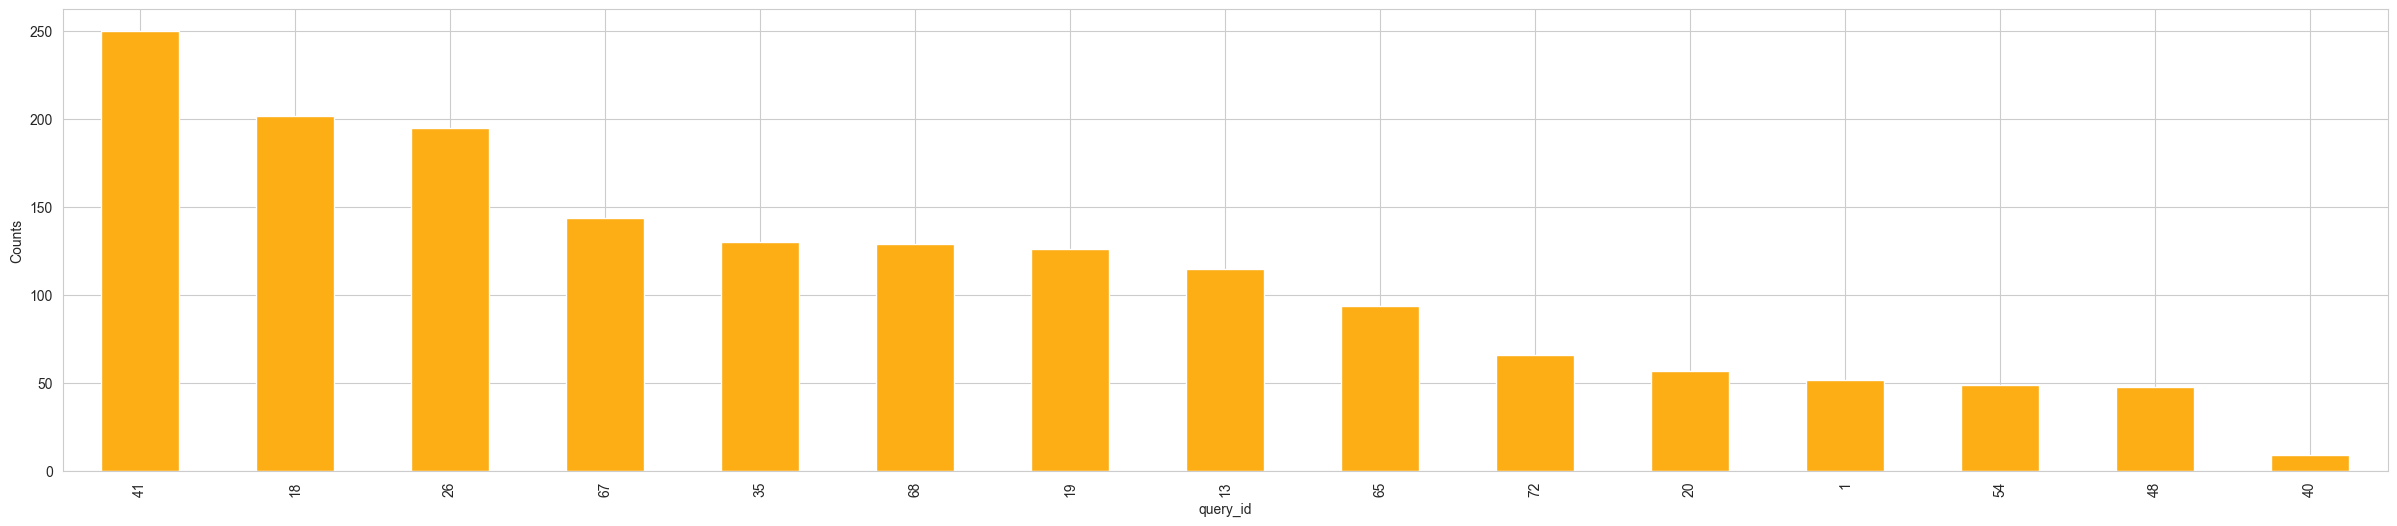

In [95]:
plot_value_counts(df_test)

In [178]:
df_train.to_csv('train_data.csv', index=False)

In [203]:
df_test.to_csv('../test_data.csv', index=False)